<a href="https://colab.research.google.com/github/Takashi-Tokyo/studyai/blob/master/Deep_learning_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ラビットチャレンジ/深層学習day3/
# Section1:再帰型ニューラルネットワークの概念
## 100文字以上の要点まとめ

・再帰型ニューラルネットワーク  
RNN(Reccurent Neural Network)とは時系列データ（音声データ、株価データ、テキストデータ等）に対応可能なニューラルネットワーク。時系列データとは、時間的順序を追って一定間隔ごとに観察され、しかも相互に統計的依存関係が認められるようなデータの系列ことをいう。
特徴として、再帰的構造がネットワークの中に組み込まれている。時系列モデルを扱うには、初期の状態と過去の状態を保持し、そこから未来の時間での状態を再帰的に求める再帰構造が必要になる。    

・BPTT(Back Propagation Through Time)    
RNNで使用される誤差逆伝播法のことで、時間方向に展開したニューラルネットワークの誤差逆伝播法と言える。BPTTによって勾配を求めるには、各時刻のRNNの中間層のデータを保持する必要があるので、時系列データの時間サイズが大きくなるとマシンの計算リソースだけではなく、メモリ使用量も増加する。  

## 実装演習

In [ ]:
import sys
import os
ENV_COLAB = True  if 'google.colab' in sys.modules else False 

# google drive のマウント
if ENV_COLAB:
  from google.colab import drive 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/DNN_code_colab_day3/notebook')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

iters:0
Loss:1.527997418830366
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 1 0 0 0 0 1]
103 + 122 = 0
------------
iters:100
Loss:1.0609811579800994
Pred:[1 1 1 1 1 0 0 0]
True:[0 1 1 0 0 0 0 1]
81 + 16 = 248
------------
iters:200
Loss:0.7831386532583592
Pred:[0 0 0 0 0 0 1 0]
True:[0 1 1 0 0 0 1 0]
51 + 47 = 2
------------
iters:300
Loss:0.9905637086696626
Pred:[0 0 1 0 0 0 0 0]
True:[0 1 1 0 0 1 0 1]
20 + 81 = 32
------------
iters:400
Loss:1.17203919505594
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 0 0 1 0 0 0]
82 + 54 = 254
------------
iters:500
Loss:0.8873165954064239
Pred:[1 1 1 1 1 1 0 0]
True:[1 1 0 1 0 0 0 0]
108 + 100 = 252
------------
iters:600
Loss:0.9091231171766846
Pred:[1 1 1 1 1 0 1 0]
True:[1 1 0 1 1 1 0 0]
98 + 122 = 250
------------
iters:700
Loss:0.7169744222760753
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 1 1 1 1 1 0]
127 + 127 = 255
------------
iters:800
Loss:0.8621175766861031
Pred:[0 1 1 1 1 0 1 0]
True:[0 0 1 1 1 0 1 0]
48 + 10 = 122
------------
iters:900
Loss:0.8411620774285464
Pred:[

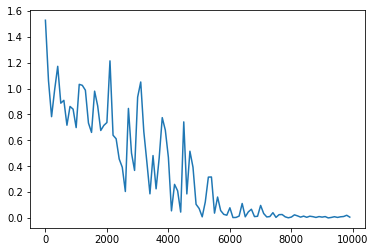

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

iters:0
Loss:1.3690042100303015
Pred:[0 1 0 1 1 1 1 1]
True:[0 0 1 0 1 0 0 1]
1 + 40 = 95
------------
iters:100
Loss:0.8578613232200231
Pred:[0 1 1 1 0 0 1 1]
True:[1 0 1 0 1 0 1 1]
120 + 51 = 115
------------
iters:200
Loss:0.8636026694579657
Pred:[0 0 1 0 1 0 1 1]
True:[0 1 1 1 0 0 1 1]
21 + 94 = 43
------------
iters:300
Loss:1.2137978627935482
Pred:[0 1 1 1 0 1 0 1]
True:[1 0 0 0 0 0 1 1]
119 + 12 = 117
------------
iters:400
Loss:0.45562400650022356
Pred:[1 0 1 0 1 1 0 1]
True:[1 0 1 0 0 1 0 1]
48 + 117 = 173
------------
iters:500
Loss:0.13612048642460378
Pred:[0 0 1 0 1 1 0 1]
True:[0 0 1 0 1 1 0 1]
2 + 43 = 45
------------
iters:600
Loss:0.8309850890593039
Pred:[0 1 1 0 1 0 1 1]
True:[0 0 1 1 1 0 1 1]
5 + 54 = 107
------------
iters:700
Loss:0.13022393865804552
Pred:[1 0 1 0 1 0 0 0]
True:[1 0 1 0 1 0 0 0]
119 + 49 = 168
------------
iters:800
Loss:0.1755485638704638
Pred:[0 1 0 0 1 1 0 1]
True:[0 1 1 0 1 1 0 1]
14 + 95 = 77
------------
iters:900
Loss:0.011929852020171865
Pre

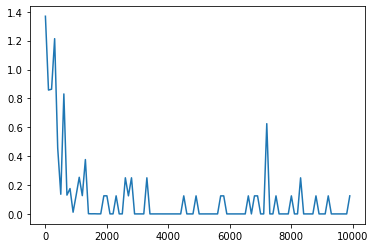

In [ ]:
#[try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう
#[try] 重みの初期化方法を変更してみよう
#Xavier, He
#[try] 中間層の活性化関数を変更してみよう
#ReLU(勾配爆発を確認しよう)
#tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
# W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
# W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
# W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
#W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
#W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
#W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))

# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
        #z[:,t+1] = functions.relu(u[:,t+1])
        z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))

        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
     
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        #delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        #delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    
        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## 確認テスト
問題：RNNのネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。残り1つの重みについて説明せよ。
答え：前の中間層から現在の中間層を定義する際にかけられる重みのこと。

## 演習チャレンジ  
以下は再帰型ニューラルネットワークにおいて構文木を入力として再帰的に文全体の表現ベクトルを得るプログラムである。ただし、ニューラルネットワークの重みパラメータはグローバル変数として定義してあるものとし、_activation関数はなんらかの活性化関数であるとする。木構造は再帰的な辞書で定義してあり、rootが最も外側の辞書であると仮定する。（く）にあてはまるのはどれか。
 ```
（1）W.dot(left + right)
（2）W.dot(np.concatenate([left, right]))
（3）W.dot(left * right)
（4）W.dot(np.maximum(left, right))

def traverse(node):
    
    node: tree node, recursive dict, {left: node', right: node''}
          if leaf, word embed vector, (embed_size,)

    W: weights, global variable, (embed_size, 2*embed_size)
    b: bias, global variable, (embed_size,)
    
    if not isinstance(node, dict):
        v = node
    else:
        left = traverse(node['left'])
        right = traverse(node['right'])
        v = _activation(W.dot(np.concatenate([left, right])) # (く)
    return v
  ```    
(解答) 2

## 確認テスト
連鎖律の原理を使い、$\frac{dz}{dx}$を求めよ。  
$$z = t^2$$  
$$t = x + y$$

答え
$$\frac{dz}{dt}=2t$$
$$\frac{dt}{dx}=1$$

$$\frac{dz}{dx}=\frac{dz}{dt}•\frac{dt}{dx}=2t=2(x+y)$$　　

## 確認テスト

下図の$y_1$を$x$・$z_0$・$z_1$・$w_{in}$・$w$・$w_{out}$を用いて数式で表せ。  
※バイアスは任意の文字で定義せよ。  
※また中間層の出力にシグモイド関数$g(x)$を作用させよ。

$ y_1=g(w_{(out)}z_1+c)=g(w_{(out)}f(w_{(in)}x_1+wz_0+b)+c)$


## コード演習問題
左の図はBPTTを行うプログラムである。なお簡単化のため活性化関数は恒等関数であるとする。また、calculate_dout関数は損失関数を出力に関して偏微分した値を返す関数であるとする。（お）にあてはまるのはどれか。  
（1）delta_t.dot(W)  
（2）delta_t.dot(U)  
（3）delta_t.dot(V)  
（4）delta_t* V  


答え(2)

# ラビットチャレンジ/深層学習day3/ Section2:LSTM
## 100文字以上の要点まとめ

・LSTM(Long short-term memory)  
勾配消失問題(勾配爆発問題)を解決するためにRNNの構造自体を変えたもの。(RNNでは、時系列を遡れば遡るほど、勾配が消失(増加)していくため、長い時系列の学習が困難であった。勾配消失とは誤差逆伝播法が下位層に進んで行くに連れて、勾配がどんどん緩やかになっていく。そのため、勾配降下法による更新では、下位層のパラメータはほとんど変わらず、訓練は最適解に収束しなくなる。)  
CEC(Cconstant Error Carousel)と、3つのゲート(入力ゲート・出力ゲート・忘却ゲート)から成る。 CECは現時刻の状態と過去から現時刻までの必要な情報を保持する機能のみを持たせたもので、時間を遡っても勾配が変わらない(常に1になる)ように設定される。このためCECは、入力データについて時間依存度に関係なく重みが一律となるためCECそれ自体では学習特性が無い(ニューラルネットワークとして機能しない)。そこで、入力ゲートおよび出力ゲートを配置し、これらにCECに何を記憶させるか、CECから何を出力させるかを学習させる。またCECは過去の情報を保持し続けるため忘却ゲートによって不要な過去の情報を削除させる。  

・勾配爆発  
勾配が層を逆伝播するごとに指数関数的に大きくなっていく。  

・CECの課題  
入力データについて、時間依存に関係なく一律である。この課題を解決するために、入力ゲートと出力ゲートを追加する。  
また、過去の状態がいらなくなった場合、そのタイミングで情報を忘却するために忘却ゲートを追加する。  

In [ ]:
import sys
import os
ENV_COLAB = True  if 'google.colab' in sys.modules else False 
if ENV_COLAB:
  from google.colab import drive 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/DNN_code_colab_day3/notebook/3_2_tf_languagemodel')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.config.run_functions_eagerly(False)

In [ ]:
import numpy as np
import re
import glob
import collections
import pickle

class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>" # 出現回数の少ない単語は未知語として定義しておく
        self.unknown_word_threshold = 3 # 未知語と定義する単語の出現回数の閾値
        self.corpus_file = "./corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()
        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:
                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [ word for word in text.split() if not word.startswith("-")]

        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)

    def prepare_data(self):
        """
        訓練データとテストデータを準備する。
        data_n = ( text データの総単語数 ) - chunk_size
        input: (data_n, chunk_size, vocabulary_size)
        output: (data_n, vocabulary_size)
        """

        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])

        # 準備したテンソルに、コーパスの one-hot 表現(self.data) のデータを埋めていく
        # i 番目から ( i + chunk_size - 1 ) 番目までの単語が１組の入力となる
        # このときの出力は ( i + chunk_size ) 番目の単語
        for i in range(self.data_n):
            all_output[:, i] = self.data[:, i + self.chunk_size] # (i + chunk_size) 番目の単語の one-hot ベクトル
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]

        # 後に使うデータ形式に合わせるために転置を取る
        all_input = all_input.transpose([2, 0, 1])
        all_output = all_output.transpose()

        # 訓練データ：テストデータを 4 : 1 に分割する
        training_num = ( self.data_n * 4 ) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]


    def build_dict(self):
        # コーパス全体を見て、単語の出現回数をカウントする
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:

                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [word for word in text.split() if not word.startswith("-")]

                counter.update(words)

        # 出現頻度の低い単語を一つの記号にまとめる
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue

            dictionary[word] = word_id
            word_id += 1
        dictionary[self.unknown_word_symbol] = word_id

        print("総単語数：", len(dictionary))

        # 辞書を pickle を使って保存しておく
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)

        self.dictionary = dictionary
        print(self.dictionary)

    def load_dict(self):
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)

    def get_word_id(self, word):
        # print(word)
        # print(self.dictionary)
        # print(self.unknown_word_symbol)
        # print(self.dictionary[self.unknown_word_symbol])
        # print(self.dictionary.get(word, self.dictionary[self.unknown_word_symbol]))
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])

    # 入力された単語を one-hot ベクトルにする
    def to_one_hot(self, word):
        index = self.get_word_id(word)
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data

    def seq_to_matrix(self, seq):
        # print(seq)
        data = np.array([self.to_one_hot(word) for word in seq]) # (data_n, vocabulary_size)
        return data.transpose() # (vocabulary_size, data_n)

def build_dict():
    cp = Corpus()
    cp.build_dict()


In [ ]:
import time
import datetime

class Language:
    """
    input layer: self.vocabulary_size
    hidden layer: rnn_size = 30
    output layer: self.vocabulary_size
    """

    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary) # 単語数
        self.input_layer_size = self.vocabulary_size # 入力層の数
        self.hidden_layer_size = 30 # 隠れ層の RNN ユニットの数
        self.output_layer_size = self.vocabulary_size # 出力層の数
        self.batch_size = 128 # バッチサイズ
        self.chunk_size = 5 # 展開するシーケンスの数。c_0, c_1, ..., c_(chunk_size - 1) を入力し、c_(chunk_size) 番目の単語の確率が出力される。
        self.learning_rate = 0.001 # 学習率
        self.epochs = 50 # 学習するエポック数
        self.forget_bias = 1.0 # LSTM における忘却ゲートのバイアス
        self.model_filename = "./data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol

        # RNN 入力前の Embedding のパラメータ　
        self.hidden_w = tf.Variable(tf.random.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        self.hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))

        # RNN 出力後の 全結合層のパラメータ
        self.output_w = tf.Variable(tf.random.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        self.output_b = tf.Variable(tf.ones([self.output_layer_size]))

        # RNN 
        #self.rnn = tf.keras.layers.SimpleRNN(self.hidden_layer_size, activation='tanh', return_sequences=True)
        self.rnn = tf.keras.layers.SimpleRNN(self.hidden_layer_size, activation='tanh')
        # SimpleRNN Layer の weight を 強制的に生成させる 
        self.rnn(np.zeros((self.chunk_size, self.batch_size, self.hidden_layer_size),np.float32)) 

        self.trainable_variables = [self.hidden_w, self.hidden_b, self.output_w, self.output_b, *self.rnn.trainable_variables]

        self.optimizer = None

    def load_weights(self, ckpt_path):
        ckpt = tf.train.load_checkpoint(ckpt_path)

        # checkpoint から明示的に変数名を指定して保存
        self.hidden_w=tf.Variable(ckpt.get_tensor("hidden_w/.ATTRIBUTES/VARIABLE_VALUE"))
        self.hidden_b=tf.Variable(ckpt.get_tensor("hidden_b/.ATTRIBUTES/VARIABLE_VALUE"))
        self.output_w=tf.Variable(ckpt.get_tensor("output_w/.ATTRIBUTES/VARIABLE_VALUE"))
        self.output_b=tf.Variable(ckpt.get_tensor("output_b/.ATTRIBUTES/VARIABLE_VALUE"))
        k1 = tf.Variable(ckpt.get_tensor("rnn_kernel/.ATTRIBUTES/VARIABLE_VALUE"))
        k2 = tf.Variable(ckpt.get_tensor("rnn_reccurent_kernel/.ATTRIBUTES/VARIABLE_VALUE"))
        b  = tf.Variable(ckpt.get_tensor("rnn_bias/.ATTRIBUTES/VARIABLE_VALUE"))
        self.rnn.set_weights([k1,k2,b])
        return
    
    def save_weights(self, model_file):
        ckpt_tf2 = tf.train.Checkpoint(hidden_w=self.hidden_w, hidden_b=self.hidden_b, 
                               output_w=self.output_w, output_b=self.output_b, 
                               rnn_kernel=self.rnn.weights[0], rnn_reccurent_kernel=self.rnn.weights[1], rnn_bias=self.rnn.weights[2])
        save_path = ckpt_tf2.save(model_file)
        print(save_path, "was saved")
        return
        
    @tf.function
    def inference(self, input_data, initial_state):
        """
        :param input_data: (batch_size, chunk_size, vocabulary_size) 次元のテンソル
        :param initial_state: (batch_size, hidden_layer_size) 次元の行列
        :return:
        """
        batch_size, chunk_size, vocab_size = input_data.shape
        
        # 現時点での入力データは (batch_size, chunk_size, input_layer_size) という３次元のテンソル
        # chunkc_size * batch_size 分の単語に対して一気に 演算を行うため tf.transpose, tf.reshape を駆使してサイズ調整する

        # shape 調整
        input_data = tf.transpose(a=input_data, perm=[1, 0, 2]) # 転置。(chunk_size, batch_size, vocabulary_size)
        input_data = tf.reshape(input_data, [-1, self.input_layer_size]) # 変形。(chunk_size * batch_size, input_layer_size)
        # 単語(シンボル)の ベクトル化
        input_data = tf.matmul(input_data, self.hidden_w) + self.hidden_b # 重みWとバイアスBを適用。 (chunk_size * batch_size, hidden_layer_size)
        # shape を 元に戻す
        input_data = tf.reshape(input_data, [chunk_size, batch_size, self.hidden_layer_size]) # 変形。(chunk_size,  batch_size, hidden_layer_size)
        input_data = tf.transpose(a=input_data, perm=[1, 0, 2]) # 転置。(batch_size, chunk_size, hidden_layer_size)
            
        # RNN の演算 予測が行えればよいので 最後の単語のみ得る
        output = self.rnn(input_data, initial_state=initial_state)
        
        # 最後に隠れ層から出力層につながる重みとバイアスを処理する
        # 最終的に softmax 関数で処理し、確率として解釈される。
        # softmax 関数はこの関数の外で定義する。
        output = tf.matmul(output, self.output_w) + self.output_b

        # # print weights
        # print(self.hidden_w[0,0]) 
        # print(self.hidden_b[0]) 
        # print(self.output_w[0,0]) 
        # print(self.output_b[0]) 
        # print(self.rnn.weights[0][0,0]) 
        # print(self.rnn.weights[1][0,0]) 
        # print(self.rnn.weights[2][0]) 
                 
        return output

    def training(self):
        # 今回は最適化手法として Adam を選択する。
        # ここの Adam の部分を変えることで、Adagrad, Adadelta などの他の最適化手法を選択することができる
        optimizer = tf.optimizers.Adam(learning_rate=self.learning_rate)
        return optimizer

    @tf.function
    def loss(self, logits, labels):
        cost = tf.reduce_mean(input_tensor=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf.stop_gradient(labels)))
        return cost

    @tf.function
    def accuracy(self, prediction, labels):
        correct = tf.equal(tf.argmax(input=prediction, axis=1), tf.argmax(input=labels, axis=1))
        accuracy = tf.reduce_mean(input_tensor=tf.cast(correct, tf.float32))
        return accuracy

    @tf.function
    def train_step(self, inputs, labels, initial_state):
        with tf.GradientTape() as tape:
            prediction = self.inference(inputs, initial_state)
            loss = self.loss(prediction, labels)

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        acc  = self.accuracy(prediction, labels)
        return loss, acc

    def train(self, model_file):
        """
        :param save_ckpt: 学習した重み係数を保存する checkpoint の名前
        :return:
        """
        # 訓練・テストデータの用意
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]

        # ここから実際に学習を走らせる
        # エポックを回す
        log_train_acc = []
        log_train_loss = []
        # log_val_acc = []
        # log_val_loss = [] 
        self.optimizer = self.training()
        for epoch in range(self.epochs):
            step = 0
            epoch_loss = 0
            epoch_acc = 0

            # 訓練データをバッチサイズごとに分けて学習させる (= optimizer を走らせる)
            # エポックごとの損失関数の合計値や（訓練データに対する）精度も計算しておく
            while (step + 1) * self.batch_size < training_num:
                start_idx = step * self.batch_size
                end_idx = (step + 1) * self.batch_size

                batch_xs = tf.Variable(trX[start_idx:end_idx, :, :].astype(np.float32))
                batch_ys = tf.Variable(trY[start_idx:end_idx, :].astype(np.float32))
                initial_state = tf.Variable(np.zeros([self.batch_size, self.hidden_layer_size],dtype=np.float32))
                c, a = self.train_step(batch_xs, batch_ys, initial_state)
                # print("Epoch:", epoch, ", step:", step, "-- loss:", c, " -- accuracy:", a)
                epoch_loss += c
                epoch_acc += a
                step += 1
            # コンソールに損失関数の値や精度を出力しておく
            print("Epoch", epoch, "completed ouf of", self.epochs, "-- loss:", epoch_loss/step, " -- accuracy:",
                    epoch_acc / step)
            log_train_acc.append( (epoch_acc / step).numpy())
            log_train_loss.append((epoch_loss/step ).numpy() )
            
        # 最後にテストデータでの精度を計算して表示する
        inputs = tf.Variable(teX.astype(np.float32))
        initial_state = tf.Variable(np.zeros([teX.shape[0], self.hidden_layer_size],dtype=np.float32))
        labels = tf.Variable(teY.astype(np.float32))
        prediction = self.inference(inputs,initial_state)
        a = self.accuracy(prediction, labels)
        c = self.loss(prediction ,labels)
        # log_val_acc.append( a.numpy() )
        # log_val_loss.append( c.numpy() )

        history = {"train_acc": log_train_acc, "train_loss": log_train_loss
        #, "val_acc":log_val_acc, "val_loss":log_val_loss
        }
        print("Accuracy on test:", a.numpy())
        
        # 学習したモデルも保存しておく
        self.save_weights(model_file)
        return history
    
    def predict(self, seq):
        """
        文章を入力したときに次に来る単語を予測する
        :param seq: 予測したい単語の直前の文字列。chunk_size 以上の単語数が必要。
        :return: 
        """
        @tf.function
        def get_predictions(input_data, initial_state):
            return tf.nn.softmax(self.inference(input_data, initial_state))

        @tf.function
        def get_predicted_labels(predictions):
            return tf.argmax(predictions, axis=1)    

        # ----------- 入力データの作成
        # seq を one-hot 表現に変換する。
        words = [word for word in seq.split() if not word.startswith("-")]
        x = np.zeros([1, self.chunk_size, self.input_layer_size], dtype=np.float32)
        for i in range(self.chunk_size):
            word = seq[len(words) - self.chunk_size + i]
            index = self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
            x[0][i][index] = 1
        x = tf.Variable(x)
        initial_state = tf.Variable(np.zeros((1,self.hidden_layer_size), dtype=np.float32))
        
        # ----------- ロードしたモデルを使って各単語の出力確率を計算 (tensorflow による計算)
        u = get_predictions(x, initial_state)
         
        # ----------  結果表示
        keys = list(self.dictionary.keys())    

        # 各単語の確率の表示
        display_num = self.vocabulary_size # 10        
        print("各単語の出現確率 (降順)")
        sorted_index = np.argsort(-u[0])
        for i in sorted_index[:display_num]:
            c = self.unknown_word_symbol if i == (self.vocabulary_size - 1) else keys[i]
            print(c, ":", u[0][i].numpy())

        # 最も確率が大きいものを予測結果とする
        v = get_predicted_labels(u)
        print()
        print("Prediction:", seq + " " + ("<???>" if v[0] == (self.vocabulary_size - 1) else keys[v[0]]))


        return

In [ ]:
ln = Language()

# 学習済みのパラメータをロード
ln.load_weights("./data_for_predict/predict_model")

# 保存したモデルを使って単語の予測をする
ln.predict("some of them looks like")

ストリーミング出力は最後の 5000 行に切り捨てられました。
matrix : 1.4417936e-14
heston's : 1.4417715e-14
pif : 1.4416918e-14
hm : 1.4416807e-14
outer : 1.441678e-14
mortgages : 1.4416697e-14
newest : 1.4416587e-14
evolution : 1.4416531e-14
occupation : 1.4416174e-14
scores : 1.441612e-14
personally : 1.441612e-14
paste : 1.441579e-14
units : 1.4415295e-14
civilian : 1.4414415e-14
sarah : 1.441436e-14
imagined : 1.4414305e-14
appearance : 1.4414085e-14
sign : 1.4413892e-14
transformation : 1.441359e-14
vary : 1.441359e-14
stlp : 1.4413289e-14
quoted : 1.4412574e-14
slower : 1.4412545e-14
accident : 1.4412518e-14
distributor : 1.4412435e-14
jury : 1.4412435e-14
murder : 1.4412327e-14
beth : 1.4412298e-14
principal : 1.4412244e-14
amazing : 1.4412078e-14
inevitably : 1.4411996e-14
kid : 1.4410897e-14
father : 1.4410375e-14
ghana : 1.4410238e-14
problematic : 1.440999e-14
nod : 1.440966e-14
sword : 1.4409523e-14
pthe : 1.4409413e-14
incompetent : 1.4408862e-14
mine : 1.4408642e-14
unhappy : 1.4408312e-14
frown : 1

## 確認テスト
シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。  
（1）0.15  
（2）0.25  
（3）0.35  
（4）0.45  
答え(2)  

## 演習チャレンジ
RNNや深いモデルでは勾配の消失または爆発が起こる傾向がある。勾配爆発を防ぐために勾配のクリッピングを行うという手法がある。具体的には勾配のノルムがしきい値を超えたら、勾配のノルムをしきい値に正規化するというものである。以下は勾配のクリッピングを行う関数である。（さ）にあてはまるのはどれか。

（1）gradient * rate

（2）gradient / norm

（3）gradient / threshold

（4）np.maximum(gradient, threshold)
```
def gradient_clipping(grad, threshold):
    """
    grad: gradient
    """
    norm = np.linalg.norm(grad)
    rate = threshold / norm
    if rate < 1:
        return grad * rate # (さ)
    return grad
```
(解答) 1

以下の文章をLSTMに入力し空欄に当てはまる単語を予測したいとする。文中の「とても」という言葉は空欄の予測においてなくなっても影響を及ぼさないと考えられる。このような場合、どのゲートが作用すると考えられるか。「映画おもしろかったね。ところで、とてもお腹が空いたから何か____。」（3分）

A.忘却ゲート

以下のプログラムはLSTMの順伝播を行うプログラムである。ただし_sigmoid関数は要素ごとにシグモイド関数を作用させる関数である。（け）にあてはまるのはどれか。

（1）output_gate a + forget_gate c

（2）forget_gate a + output_gate c

（3）input_gate a + forget_gate c

（4）forget_gate a + input_gate c
```
# def lstm(x, prev_h, prev_c, W, U, b):
    x: inputs, (batch_size, input_size)
    prev_h: outputs at the previous time step, (batch_size, state_size)
    prev_c: cell states at the previous time step, (batch_size, state_size)
    W: upward weights, (4*state_size, input_size)
    U: lateral weights, (4*state_size, state_size)
    b: bias, (4*state_size, )

    # セルへの入力やゲートをまとめて計算し、分割
    lstm_in = _activation(x.dot(W.T) + prev_h.dot(U.T) + b)
    a, i, f, o = np.hsplit(lstm_in, 4)

    # 値を変換、セルへの入力:(-1, 1), ゲート:(0, 1)
    a = np.tanh(a)
    input_gate = _sigmoid(i)
    forget_gate = _sigmoid(f)
    output_gate = _sigmoid(o)

    # セルの状態を更新し、中間層の出力を計算
    c = input_gate * a + forget_gate * c # (け)
    h = output_gate * np.tanh(c) 
    return c, h
```
(解答) 3

LSTMとCECが抱える課題について、それぞれ簡潔に述べよ。（3分）

 CECは前回までの情報を保持する機能しかなく、学習する機能がない。このためLSTMは、3つのゲートを用意し、全体として学習する機能を持たせるが、その分学習するパラメータが膨大になり、計算負荷が大きい。
LSTM(Long Short-Term Memory)は、 RNN の長期記憶が難しい、という欠点を補うために、勾配消失対策の内部記憶(CEC:Constant Error Carousel)を 設け、さらに CEC の周囲に複数のゲートを備えるなどし ている。LSTM は手書き文字認識やテキスト発声システム など様々な応用がなされている。
しかし LSTM は複雑な構造をしており、計算量、メモリ 共に多くを要する。複数の時系列を同時に取り扱う、非常 に長期の時系列入力を取り扱う、などの応用を考えた場合、 これらが障壁となる。そのため LSTM の構造を簡略化する 派生型が複数提案されている。簡略化の基本的方向性は CEC およびゲートの削減である。

# ラビットチャレンジ/深層学習day3/ Section3:GRU
## 100文字以上の要点まとめ

GRU(Gated Recurrent Unit)：LSTMの改良版。LSTMはパラメータの数が多く、計算負荷が高い場合があるのに対して、GRUはパラメータ数を大幅に削減して、精度は同等もしくはそれ以上が期待できるモデルである。
更新ゲートとリセットゲートを構成要素としてモデルに組み込まれている。

# 実装演習

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_day3')

loss: 1.9106530112992623e-06    d: [-0.29761864]    y: [-0.29566383]
loss: 4.009145134726445e-06    d: [-0.56307233]    y: [-0.56024067]
loss: 4.1170041815299796e-06    d: [-0.65766776]    y: [-0.65479826]
loss: 1.2186275784353541e-06    d: [0.13182648]    y: [0.13026531]
loss: 2.8569091862187926e-06    d: [0.49909101]    y: [0.49670065]
loss: 2.96835458163875e-05    d: [0.9518317]    y: [0.9441267]
loss: 3.0276143721344284e-05    d: [0.97784112]    y: [0.97005959]
loss: 3.462518923008676e-06    d: [-0.58880346]    y: [-0.58617192]
loss: 1.6259323267389834e-05    d: [-0.78351093]    y: [-0.77780842]
loss: 2.265698201956606e-06    d: [-0.49909101]    y: [-0.4969623]
loss: 1.582143105987843e-06    d: [0.21857331]    y: [0.21679447]
loss: 2.3430828768738427e-07    d: [-0.33938943]    y: [-0.33870488]
loss: 2.5337797976245463e-06    d: [-0.43793098]    y: [-0.43567986]
loss: 2.0617518493134026e-06    d: [-0.33346065]    y: [-0.33143001]
loss: 2.360468612841957e-05    d: [-0.99639027]    y:

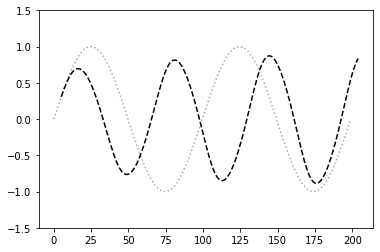

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

# sin曲線
round_num = 10
div_num = 500
ts = np.linspace(0, round_num * np.pi, div_num)
f = np.sin(ts)

def d_tanh(x):
    return 1/(np.cosh(x)**2 + 1e-4)

# ひとつの時系列データの長さ
maxlen = 5

# sin波予測の入力データ
test_head = [[f[k]] for k in range(0, maxlen)]

data = []
target = []

for i in range(div_num - maxlen):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])
    
X = np.array(data).reshape(len(data), maxlen, 1)
D = np.array(target).reshape(len(data), 1)

# データ設定
N_train = int(len(data) * 0.8)
N_validation = len(data) - N_train

x_train, x_test, d_train, d_test = train_test_split(X, D, test_size=N_validation)

input_layer_size = 1
hidden_layer_size = 5
output_layer_size = 1

weight_init_std = 0.01
learning_rate = 0.1

iters_num = 500

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

us = []
zs = []

u = np.zeros(hidden_layer_size)
z = np.zeros(hidden_layer_size)
y = np.zeros(output_layer_size)

delta_out = np.zeros(output_layer_size)
delta = np.zeros(hidden_layer_size)

losses = []

# トレーニング
for i in range(iters_num):
    for s in range(x_train.shape[0]):
        us.clear()
        zs.clear()
        z *= 0
        
        # sにおける正解データ
        d = d_train[s]

        xs = x_train[s]        
        
        # 時系列ループ
        for t in range(maxlen):
            
            # 入力値
            x = xs[t]
            u = np.dot(x, W_in) + np.dot(z, W)
            us.append(u)
            z = np.tanh(u)
            zs.append(z)

        y = np.dot(z, W_out)
        
        #誤差
        loss = functions.mean_squared_error(d, y)
        
        delta_out = functions.d_mean_squared_error(d, y)
        
        delta *= 0
        for t in range(maxlen)[::-1]:
            
            delta = (np.dot(delta, W.T) + np.dot(delta_out, W_out.T)) * d_tanh(us[t])
            
            # 勾配更新
            W_grad += np.dot(zs[t].reshape(-1,1), delta.reshape(1,-1))
            W_in_grad += np.dot(xs[t], delta.reshape(1,-1))
        W_out_grad = np.dot(z.reshape(-1,1), delta_out)
        
        # 勾配適用
        W -= learning_rate * W_grad
        W_in -= learning_rate * W_in_grad
        W_out -= learning_rate * W_out_grad.reshape(-1,1)
            
        W_in_grad *= 0
        W_out_grad *= 0
        W_grad *= 0

# テスト        
for s in range(x_test.shape[0]):
    z *= 0

    # sにおける正解データ
    d = d_test[s]

    xs = x_test[s]

    # 時系列ループ
    for t in range(maxlen):

        # 入力値
        x = xs[t]
        u = np.dot(x, W_in) + np.dot(z, W)
        z = np.tanh(u)

    y = np.dot(z, W_out)

    #誤差
    loss = functions.mean_squared_error(d, y)
    print('loss:', loss, '   d:', d, '   y:', y)
        
        
        
original = np.full(maxlen, None)
pred_num = 200

xs = test_head

# sin波予測
for s in range(0, pred_num):
    z *= 0
    for t in range(maxlen):
        
        # 入力値
        x = xs[t]
        u = np.dot(x, W_in) + np.dot(z, W)
        z = np.tanh(u)

    y = np.dot(z, W_out)
    original = np.append(original, y)
    xs = np.delete(xs, 0)
    xs = np.append(xs, y)

plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(np.sin(np.linspace(0, round_num* pred_num / div_num * np.pi, pred_num)), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.show()


[try]
iters_numを100にしよう
maxlenを5, iters_numを500, 3000(※時間がかかる)にしよう

loss: 1.0231756688240315e-07    d: [-0.29761864]    y: [-0.29716628]
loss: 1.2201090155920323e-08    d: [-0.56307233]    y: [-0.56322854]
loss: 4.038245319603949e-11    d: [-0.65766776]    y: [-0.65765877]
loss: 1.0126131714852026e-08    d: [0.13182648]    y: [0.13168417]
loss: 6.953992391227437e-08    d: [0.49909101]    y: [0.49871807]
loss: 5.5838333193818506e-08    d: [0.9518317]    y: [0.95149752]
loss: 1.006541644073702e-07    d: [0.97784112]    y: [0.97739245]
loss: 1.7033534573059554e-08    d: [-0.58880346]    y: [-0.58861889]
loss: 5.2622812685420113e-08    d: [-0.78351093]    y: [-0.78383534]
loss: 2.609182825988997e-10    d: [-0.49909101]    y: [-0.49906816]
loss: 5.7128497213479914e-08    d: [0.21857331]    y: [0.21823529]
loss: 9.126545094844397e-08    d: [-0.33938943]    y: [-0.3389622]
loss: 1.0304339135521172e-07    d: [-0.43793098]    y: [-0.43747701]
loss: 1.1445752972811905e-07    d: [-0.33346065]    y: [-0.3329822]
loss: 4.4870288964406624e-08    d: [-0.99639027]    

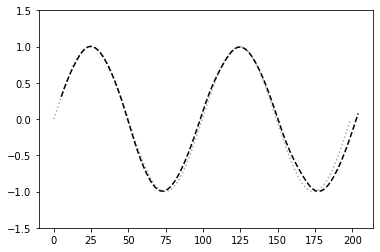

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

# sin曲線
round_num = 10
div_num = 500
ts = np.linspace(0, round_num * np.pi, div_num)
f = np.sin(ts)

def d_tanh(x):
    return 1/(np.cosh(x)**2 + 1e-4)

# ひとつの時系列データの長さ
maxlen = 5

# sin波予測の入力データ
test_head = [[f[k]] for k in range(0, maxlen)]

data = []
target = []

for i in range(div_num - maxlen):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])
    
X = np.array(data).reshape(len(data), maxlen, 1)
D = np.array(target).reshape(len(data), 1)

# データ設定
N_train = int(len(data) * 0.8)
N_validation = len(data) - N_train

x_train, x_test, d_train, d_test = train_test_split(X, D, test_size=N_validation)

input_layer_size = 1
hidden_layer_size = 5
output_layer_size = 1

weight_init_std = 0.01
learning_rate = 0.1

iters_num = 3000

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

us = []
zs = []

u = np.zeros(hidden_layer_size)
z = np.zeros(hidden_layer_size)
y = np.zeros(output_layer_size)

delta_out = np.zeros(output_layer_size)
delta = np.zeros(hidden_layer_size)

losses = []

# トレーニング
for i in range(iters_num):
    for s in range(x_train.shape[0]):
        us.clear()
        zs.clear()
        z *= 0
        
        # sにおける正解データ
        d = d_train[s]

        xs = x_train[s]        
        
        # 時系列ループ
        for t in range(maxlen):
            
            # 入力値
            x = xs[t]
            u = np.dot(x, W_in) + np.dot(z, W)
            us.append(u)
            z = np.tanh(u)
            zs.append(z)

        y = np.dot(z, W_out)
        
        #誤差
        loss = functions.mean_squared_error(d, y)
        
        delta_out = functions.d_mean_squared_error(d, y)
        
        delta *= 0
        for t in range(maxlen)[::-1]:
            
            delta = (np.dot(delta, W.T) + np.dot(delta_out, W_out.T)) * d_tanh(us[t])
            
            # 勾配更新
            W_grad += np.dot(zs[t].reshape(-1,1), delta.reshape(1,-1))
            W_in_grad += np.dot(xs[t], delta.reshape(1,-1))
        W_out_grad = np.dot(z.reshape(-1,1), delta_out)
        
        # 勾配適用
        W -= learning_rate * W_grad
        W_in -= learning_rate * W_in_grad
        W_out -= learning_rate * W_out_grad.reshape(-1,1)
            
        W_in_grad *= 0
        W_out_grad *= 0
        W_grad *= 0

# テスト        
for s in range(x_test.shape[0]):
    z *= 0

    # sにおける正解データ
    d = d_test[s]

    xs = x_test[s]

    # 時系列ループ
    for t in range(maxlen):

        # 入力値
        x = xs[t]
        u = np.dot(x, W_in) + np.dot(z, W)
        z = np.tanh(u)

    y = np.dot(z, W_out)

    #誤差
    loss = functions.mean_squared_error(d, y)
    print('loss:', loss, '   d:', d, '   y:', y)
        
        
        
original = np.full(maxlen, None)
pred_num = 200

xs = test_head

# sin波予測
for s in range(0, pred_num):
    z *= 0
    for t in range(maxlen):
        
        # 入力値
        x = xs[t]
        u = np.dot(x, W_in) + np.dot(z, W)
        z = np.tanh(u)

    y = np.dot(z, W_out)
    original = np.append(original, y)
    xs = np.delete(xs, 0)
    xs = np.append(xs, y)

plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(np.sin(np.linspace(0, round_num* pred_num / div_num * np.pi, pred_num)), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.show()

3000回だとsin波の予測が高精度でできている。

## 確認テスト
LSTMとGRUの違いを簡潔に述べよ。  
(解答) LSTMのパラメータ数を大幅に削減し、計算負荷を軽減したものがGRUである。LSTMには入力ゲート、出力ゲート、忘却ゲート、CECがある。対して、GRUにはCECがなく更新ゲートとリセットゲートを持つ。そのため、LSTMはパラメータが多く、GRUはパラメータが少ない。
結果的にLSTMよりGRUの方が計算量は少ない。

## 演習チャレンジ
GRU(Gated Recurrent Unit)もLSTMと同様にRNNの一種であり、単純なRNNにおいて問題となる勾配消失問題を解決し、長期的な依存関係を学習することができる。LSTMに比べ変数の数やゲートの数が少なく、より単純なモデルであるが、タスクによってはLSTMより良い性能を発揮する。以下のプログラムはGRUの順伝播を行うプログラムである。ただし_sigmoid関数は要素ごとにシグモイド関数を作用させる関数である。（こ）にあてはまるのはどれか。

（1）z * h_bar

（2）(1-z) * h_bar

（3）z h h_bar

（4）(1-z) h + z h_bar
```
def gru(x, h, W_r, U_r, W_z, U_z, W, U):
    """
    x: inputs, (batch_size, input_size)
    h: outputs at the previous time step, (batch_size, state_size)
    W_r, U_r: wights for reset gate
    W_z, U_z: weights for update gate
    U, W: weights for new state
    """
    # ゲートを計算
    r = _sigmoid(x.dot(W_r.T) + h.dot(U_r.T))
    z = _sigmoid(x.dot(W_z.T) + h.dot(U_z.T))

    # 次状態を計算
    h_bar = np.tanh(x.dot(W.T) + (r * h).dot(U.T))
    h_new = (1 - z) * h + z * h_bar # (こ)
    return h_new
(解答) 4



# ラビットチャレンジ/深層学習day3/ Section4:双方向RNN
## 100文字以上の要点まとめ

双方向RNN（Bidirectional RNN）：過去の情報だけでなく、未来の情報を加味する事で、精度を向上させるためのモデル。
機械翻訳や文章の推敲/要約等のテキスト処理に主に利用される。
文章というのは過去の情報も未来の情報も１度に入ってくる。双方向の利点として、過去の単語列と、その先に書いてある単語列もアクセスできる。

# フレームワーク演習 双方向RNN/勾配のクリッピング 
## 実装演習

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
dataset_train, dataset_valid, dataset_test = tfds.load('spoken_digit', split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'], shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/spoken_digit/1.0.9.incompleteM4P8NR/spoken_digit-train.tfrecord


  0%|          | 0/2500 [00:00<?, ? examples/s]

Dataset spoken_digit downloaded and prepared to /root/tensorflow_datasets/spoken_digit/1.0.9. Subsequent calls will reuse this data.


In [ ]:
original_iter = iter(dataset_train)

In [ ]:
next(original_iter)

{'audio': <tf.Tensor: shape=(1525,), dtype=int64, numpy=array([   0,    0, -256, ..., -512, -256, -512])>,
 'audio/filename': <tf.Tensor: shape=(), dtype=string, numpy=b'2_nicolas_23.wav'>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}

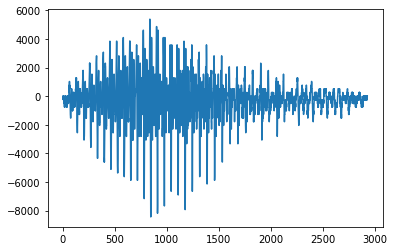

In [ ]:
plt.plot(next(original_iter)['audio'])

In [ ]:
NUM_DATA_POINTS = 1000
BATCH_SIZE = 8

In [ ]:
def cut_if_longer(el):
  return (
          tf.reshape(
              tf.cond(
                tf.greater(tf.shape(el['audio']), NUM_DATA_POINTS),
                true_fn=lambda: tf.slice(el['audio'], begin=[0], size=[NUM_DATA_POINTS]),
                false_fn=lambda: tf.slice(tf.concat([el['audio'], tf.zeros(NUM_DATA_POINTS, tf.int64)], axis=0), begin=[0], size=[NUM_DATA_POINTS])
              ),
              shape=(-1, 1)
          ),
          [el['label']]
        )


dataset_prep_train = dataset_train.map(cut_if_longer).batch(BATCH_SIZE)
dataset_prep_valid = dataset_valid.map(cut_if_longer).batch(BATCH_SIZE)

sample = next(iter(dataset_prep_valid))
sample

(<tf.Tensor: shape=(8, 1000, 1), dtype=int64, numpy=
 array([[[    0],
         [ -256],
         [ -256],
         ...,
         [-1792],
         [-1024],
         [    0]],
 
        [[   -8],
         [   -9],
         [  -14],
         ...,
         [  139],
         [  193],
         [  192]],
 
        [[    4],
         [    5],
         [   10],
         ...,
         [  149],
         [  145],
         [  117]],
 
        ...,
 
        [[   -6],
         [   -5],
         [   -3],
         ...,
         [    1],
         [  249],
         [  559]],
 
        [[ -390],
         [ -639],
         [ -797],
         ...,
         [ 1138],
         [-1044],
         [-2135]],
 
        [[ -256],
         [ -256],
         [ -512],
         ...,
         [ -512],
         [ -512],
         [ -768]]])>, <tf.Tensor: shape=(8, 1), dtype=int64, numpy=
 array([[6],
        [7],
        [7],
        [5],
        [1],
        [9],
        [4],
        [4]])>)

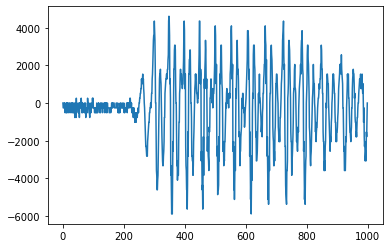

In [ ]:
plt.plot(sample[0][0])

In [ ]:
## 小規模な畳み込みニューラルネットワーク
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

tf.keras.backend.clear_session()

model_1 = tf.keras.models.Sequential()


model_1.add(layers.Input((NUM_DATA_POINTS, 1)))

model_1.add(layers.Conv1D(32, 4, strides=2, activation='relu'))
model_1.add(layers.MaxPooling1D(2))

model_1.add(layers.GlobalAveragePooling1D())

model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()


model_1.predict(sample[0])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 499, 32)           160       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 32)          0         
 )                                                               
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 490
Trainable params: 490
Non-trainable params: 0
_________________________________________________________________


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.5804623e-28],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.8112205e-15,
        0.0000000e+00, 0.0000000e+00, 9.9980325e-01, 7.9656487e-10,
        0.0000000e+00, 1.9672773e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.7411430e-36,
        0.0000000e+00, 0.0000000e+00, 9.9999893e-01, 8.6074575e-22,
        0.0000000e+00, 1.0299696e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0237560e-14,
        0.0000000e+00, 0.0000000e+00, 5.5233598e-01, 1.2272384e-10,
        0.0000000e+00, 4.4766399e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.8788144e-17, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3401055e-17,
        0.0000000e+00, 0.0000000e+00, 9.9969125e-01, 6.17

In [ ]:
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_1.fit(
    dataset_prep_train,
    validation_data=dataset_prep_valid,
)

219/219 [==============================] - 3s 8ms/step - loss: 89.8529 - accuracy: 0.1989 - val_loss: 17.9143 - val_accuracy: 0.2000


In [ ]:
print('loss / accuracy')
model_1.evaluate(dataset_prep_valid)

loss / accuracy
47/47 [==============================] - 0s 3ms/step - loss: 17.9143 - accuracy: 0.2000


[17.91425323486328, 0.20000000298023224]

In [ ]:
## 単純RNNを使用したモデル
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



tf.keras.backend.clear_session()

model_2 = tf.keras.models.Sequential()

model_2.add(layers.Input((NUM_DATA_POINTS, 1)))
model_2.add(layers.SimpleRNN(128))

model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()


model_2.predict(sample[0]).shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 17,930
Trainable params: 17,930
Non-trainable params: 0
_________________________________________________________________


(8, 10)

In [ ]:
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(
    dataset_prep_train,
    validation_data=dataset_prep_valid,
)

219/219 [==============================] - 190s 868ms/step - loss: 2.3811 - accuracy: 0.1040 - val_loss: 2.3611 - val_accuracy: 0.0880


In [ ]:
# GRUを使用したモデル
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



tf.keras.backend.clear_session()

model_3 = tf.keras.models.Sequential()

model_3.add(layers.Input((NUM_DATA_POINTS, 1)))
model_3.add(layers.GRU(128))

model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()


model_3.predict(sample[0]).shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 51,594
Trainable params: 51,594
Non-trainable params: 0
_________________________________________________________________


(8, 10)

In [ ]:
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(
    dataset_prep_train,
    validation_data=dataset_prep_valid,
)

219/219 [==============================] - 12s 43ms/step - loss: 2.3724 - accuracy: 0.1109 - val_loss: 2.2944 - val_accuracy: 0.1307


In [ ]:
# 双方向RNN(LSTM)を使用したモデル
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



tf.keras.backend.clear_session()

model_4 = tf.keras.models.Sequential()

model_4.add(layers.Input((NUM_DATA_POINTS, 1)))
model_4.add(layers.Bidirectional(layers.LSTM(64)))

model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()


model_4.predict(sample[0]).shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              33792     
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________


(8, 10)

In [ ]:
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_4.fit(
    dataset_prep_train,
    validation_data=dataset_prep_valid,
)

219/219 [==============================] - 17s 65ms/step - loss: 2.3074 - accuracy: 0.1434 - val_loss: 2.1762 - val_accuracy: 0.2027


In [ ]:
## 勾配クリッピング
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



tf.keras.backend.clear_session()

model_5 = tf.keras.models.Sequential()

model_5.add(layers.Input((NUM_DATA_POINTS, 1)))
model_5.add(layers.LSTM(64))

model_5.add(layers.Dense(10, activation='softmax'))

model_5.summary()


model_5.predict(sample[0]).shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 17,546
Trainable params: 17,546
Non-trainable params: 0
_________________________________________________________________


(8, 10)

In [ ]:
#optimizerにclipvalueを指定する
model_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
    metrics=['accuracy']
)

model_5.fit(
    dataset_prep_train,
    validation_data=dataset_prep_valid,
)

219/219 [==============================] - 13s 47ms/step - loss: 2.3550 - accuracy: 0.1046 - val_loss: 2.2962 - val_accuracy: 0.1013


## 演習チャレンジ
以下は双方向RNNの順伝播を行うプログラムである。順方向については、入力から中間層への重みW_f, 一ステップ前の中間層出力から中間層への重みをU_f、逆方向に関しては同様にパラメータW_b, U_bを持ち、両者の中間層表現を合わせた特徴から出力層への重みはVである。_rnn関数はRNNの順伝播を表し中間層の系列を返す関数であるとする。（か）にあてはまるのはどれか

（1）h_f + h_b[::-1]

（2）h_f * h_b[::-1]

（3）np.concatenate([h_f, h_b[::-1]], axis=0)

（4）np.concatenate([h_f, h_b[::-1]], axis=1)
```
def bidirectional_net(xs, W_f, U_f, W_b, U_b, V):
    """
    W_f, U_f: forward rnn weights, (hidden_size, input_size)
    W_b, U_b: backward rnn weights, (hidden_size, input_size)
    V: outputs weights, (output_size, 2*hidden_size)
    """
    xs_f = np.zeros_like(xs)
    xs_b = np.zeros_like(xs)
    for i, x in enumerate(xs):
        xs_f[i] = x
        xs_b[i] = x[::-1]
    hs_f = _rnn(xs_f, W_f, U_f)
    hs_b = _rnn(xs_b, W_b, U_b)
    hs =[np.concatenate([h_f, h_b[::-1]], axis=1) for h_f, h_b in zip(hs_f, hs_b)] # (か)
    ys = hs.dot(V.T)
    return ys
```

# ラビットチャレンジ/深層学習day3/ Section5:Seq2Seq
## 100文字以上の要点まとめ

・Seq2Seq(Sequence to Sequenceモデル)  
Encoder-Decoderモデルの一種で、入力した時系列データを別の時系列データに変換(または別の時系列データを生成)するものである。2つのRNN(Encoder RNNとDecoder RNN)から成り、機械対話や機械翻訳などに使用されている。  


・Encoder RNN  
ユーザーがインプットしたテキストデータを単語等のトークンに区切って渡す構造となっており、Taking(文章を単語等のトークン毎に分割し、トークンごとのIDに分割する。)、Embedding(IDからそのトークンを表す分散表現ベクトルに変換)を経てベクトルを順番にRNNに入力する。まずvec1をRNNに入力し、hiddenstateを出力し、このhiddenstateと次の入力vec2をまたRNNに入力し、hidden stateを出力する、という流れを繰り返す。最後のvecを入れたときのhiddenstateをfinalstateとして保持する。このfinalstateがthoughtvectorと呼ばれ、入力した文の意味を表すベクトルとなる。  

・Decoder RNN  
出力データを単語等のトークンごとに生成する構造となっており、処理手順として、Encoder RNNのfinal state(thought vector)から、各tokenの生成確率を出力する。final stateをDecoder RNNのinitial stateとして設定し、Embeddingを入力する。  

・Sampling:生成確率にもとづいてtokenをランダムに選ぶ。  
・Embedding:2で選ばれたtokenをEmbeddingしてDecoder RNNへの次の入力とする。  
・Detokenize:1-3を繰り返し、2で得られたtokenを文字列に直す。  
・one hot vector：文章を単語などのトークンと呼ばれる単位に分割し、IDを割り当てる。  
・単語埋め込み（Embedding）：このIDからそのトークンを表す分散表現ベクトルに変換する。単語の特徴を反映したベクトルを得る。  


・HRED  
seq2seqの課題として、一問一答しかできないため、問いに対して文脈も何もなく、ただ応答が行われる続けることが挙げられる。HREDでは、過去n-1個の発話から次の発話を生成させる。これによってHREDでは、前の単語の流れに即して応答されるためより人間らしい文章が生成される。HREDは、Seq2SeqにContext RNN(Encoderのまとめた各文章の系列をまとめて、これまでの会話コンテキスト全体を表すベクトルに変換する構造)を加えた構造となっていて、これによって過去の発話の履歴を加味した返答ができる。しかしながら、HREDは確率的な多様性が字面にしかなく、会話の「流れ」のような多様性が無いため、同じコンテキスト（発話リスト）を与えられても、答えの内容が毎回会話の流れとしては同じものしか出せない。そのため、短く情報量に乏しい答え、つまり短いよくある答えを学ぶ傾向がある(ex)「うん」「そうだね」「・・・」など)。  

オートエンコーダー  
教師なし学習の一つで、学習時の入力データは訓練データのみで教師データは利用しない。例えば、画像を入力して同じ画像を出力する構造となっている。EncoderとDecoderからなり、Encoderは入力データから潜在変数zに変換するニューラルネットワークで、Decoderでは、その潜在変数zをインプットとして元データを復元するニューラルネットワーク構造となっている。zの次元が入力データより小さい場合、次元削減とみなすことができる。  

VAE(Variational Autoencoder)  
潜在変数zに確率分布N(0,1)を仮定したモデルで、データをzの確率分布（という構造）に落とし込むことができる。通常のオートエンコーダーにおいて、潜在変数zに何かしらデータを押し込めているが、その構造がどのような状態か不明だという課題に対して対応。  
実際にVAEを学習を行う場合、より汎用性の高い特徴を掴むために、Encoderと潜在変数zの間にノイズを付与する。  

# フレームワーク演習 Seq2Seq
## 実装演習

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 100)
seq_in = np.sin(x)
seq_out = np.cos(x)

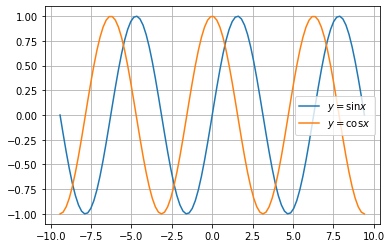

In [ ]:
plt.plot(x, seq_in, label='$y=\sin x$')
plt.plot(x, seq_out, label='$y=\cos x$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#モデルを定義するパラメータの準備
#入力データの次元数
NUM_ENC_TOKENS = 1
#出力データの次元数
NUM_DEC_TOKENS = 1
#単純RNN層の出力次元数(コンテキストの次元数にもなる)
NUM_HIDDEN_PARAMS = 10
#モデルへ入力するデータの時間的なステップ数。
NUM_STEPS = 24

In [ ]:
tf.keras.backend.clear_session()

e_input = tf.keras.layers.Input(shape=(NUM_STEPS, NUM_ENC_TOKENS), name='e_input')
_, e_state = tf.keras.layers.SimpleRNN(NUM_HIDDEN_PARAMS, return_state=True, name='e_rnn')(e_input)

d_input = tf.keras.layers.Input(shape=(NUM_STEPS, NUM_DEC_TOKENS), name='d_input')
d_rnn = tf.keras.layers.SimpleRNN(NUM_HIDDEN_PARAMS, return_sequences=True, return_state=True, name='d_rnn')
d_rnn_out, _ = d_rnn(d_input, initial_state=[e_state])

d_dense = tf.keras.layers.Dense(NUM_DEC_TOKENS, activation='linear', name='d_output')
d_output = d_dense(d_rnn_out)

model_train = tf.keras.models.Model(inputs=[e_input, d_input], outputs=d_output)
model_train.compile(optimizer='adam', loss='mean_squared_error')

model_train.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 e_input (InputLayer)           [(None, 24, 1)]      0           []                               
                                                                                                  
 d_input (InputLayer)           [(None, 24, 1)]      0           []                               
                                                                                                  
 e_rnn (SimpleRNN)              [(None, 10),         120         ['e_input[0][0]']                
                                 (None, 10)]                                                      
                                                                                                  
 d_rnn (SimpleRNN)              [(None, 24, 10),     120         ['d_input[0][0]',            

In [ ]:
#モデルの定義に合わせて学習用データを準備する。
#ex: エンコーダーの入力として使用する値。
#dx: デコーダーの入力として渡す値。最終的に出力したい値の1つ前のステップの値。
#dy: 最終的に推論したい値。dxと比べて時間的に1ステップ先の値となっている。

n = len(x) - NUM_STEPS
ex = np.zeros((n, NUM_STEPS))
dx = np.zeros((n, NUM_STEPS))
dy = np.zeros((n, NUM_STEPS))

for i in range(0, n):
  ex[i] = seq_in[i:i + NUM_STEPS]
  dx[i, 1:] = seq_out[i:i + NUM_STEPS - 1]
  dy[i] = seq_out[i: i + NUM_STEPS]

ex = ex.reshape(n, NUM_STEPS, 1)
dx = dx.reshape(n, NUM_STEPS, 1)
dy = dy.reshape(n, NUM_STEPS, 1)

In [ ]:
#学習を行う。
#ミニバッチのサイズ: 16 エポック数: 80回

BATCH_SIZE = 16
EPOCHS = 80

history = model_train.fit([ex, dx], dy, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, verbose=False)

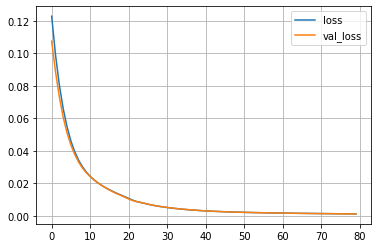

In [ ]:
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss, label='loss')

loss = history.history['val_loss']
plt.plot(np.arange(len(loss)), loss, label='val_loss')

plt.grid()
plt.legend()
plt.show()

In [ ]:
model_pred_e = tf.keras.models.Model(inputs=[e_input], outputs=[e_state])

pred_d_input = tf.keras.layers.Input(shape=(1, 1))
pred_d_state_in = tf.keras.layers.Input(shape=(NUM_HIDDEN_PARAMS))

pred_d_output, pred_d_state = d_rnn(pred_d_input, initial_state=[pred_d_state_in])
pred_d_output = d_dense(pred_d_output)


pred_d_model = tf.keras.Model(inputs=[pred_d_input, pred_d_state_in], outputs=[pred_d_output, pred_d_state])

モデルの推論を行う関数を準備する。  
関数内では、  
1.エンコーダーで初期のコンテキストを取得する。  
2.デコーダーで初期のコンテキストと1文字目を元に推論を開始する。  
3.デコーダーから最終出力とコンテキストが出力され、次のステップでのデコーダーのコンテキスト･文字  

In [ ]:
def predict(input_data):
  state_value = model_pred_e.predict(input_data)
  _dy = np.zeros((1, 1, 1))
  
  output_data = []
  for i in range(0, NUM_STEPS):
    y_output, state_value = pred_d_model.predict([_dy, state_value])
    
    output_data.append(y_output[0, 0, 0])
    _dy[0, 0, 0] = y_output

  return output_data

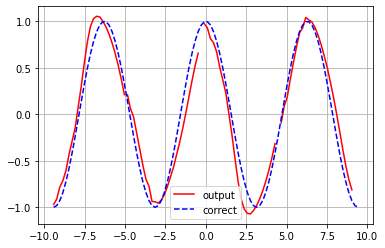

In [ ]:
init_points = [0, 24, 49, 74]

for i in init_points:
  _x = ex[i : i + 1]
  _y = predict(_x)
    
  if i == 0:
    plt.plot(x[i : i + NUM_STEPS], _y, color="red", label='output')
  else:
    plt.plot(x[i : i + NUM_STEPS], _y, color="red")

plt.plot(x, seq_out, color = 'blue', linestyle = "dashed", label = 'correct')
plt.grid()
plt.legend()
plt.show() 

## 確認テスト
・下記の選択肢から、seq2seqについて説明しているものを選べ。  
（1）時刻に関して順方向と逆方向のRNNを構成し、それら2つの中間層表現を特徴量として利用するものである。  
（2）RNNを用いたEncoder-Decoderモデルの一種であり、機械翻訳などのモデルに使われる。  
（3）構文木などの木構造に対して、隣接単語から表現ベクトル（フレーズ）を作るという演算を再帰的に行い（重みは共通）、文全体の表現ベクトルを得るニューラルネットワークである。  
（4）RNNの一種であり、単純なRNNにおいて問題となる勾配消失問題をCECとゲートの概念を導入することで解決したものである。  

A.(2)


・seq2seqとHRED、HREDとVHREDの違いを簡潔に述べよ。  

Seq2Seqは、モデルの挙動、処理に文脈が考慮されない。単語間の1問1答しかできない。 対して、HREDは文章の過去の文脈というものを考慮するContextRNNという仕組みを持つ。
HREDは確かに文脈を意識した文を作る事ができるのだが、「うん」「そうだね」等のありがちな答えしか出さなくなる場合がある。VHREDは文脈を意識しながら文を生成するモデルにバリエーションを持たせられるように工夫を施した仕組みである。

・VAEに関する下記の説明文中の空欄に当てはまる言葉を答えよ。自己符号化器の潜在変数に____を導入したもの。  

A.確率分布(標準正規分布)




## 演習チャレンジ

機械翻訳タスクにおいて、入力は複数の単語から成る文（文章）であり、それぞれの単語はone-hotベクトルで表現されている。Encoderにおいて、それらの単語は単語埋め込みにより特徴量に変換され、そこからRNNによって（一般にはLSTMを使うことが多い）時系列の情報をもつ特徴へとエンコードされる。以下は、入力である文（文章）を時系列の情報をもつ特徴量へとエンコードする関数である。ただし_activation関数はなんらかの活性化関数を表すとする。（き）にあてはまるのはどれか。

（1）E.dot(w)

（2）E.T.dot(w)

（3）w.dot(E.T)

（4）E * w
```
def encode(words, E, W, U, b):
    """
    words: sequence words (sentence), one-hot vector, (n_words, vocab_size)
    E: word embedding matrix, (smbed_size, vocab_size)
    W: upward_weights, (hidden_size, hidden_size)
    U: lateral weights, (hidden_size, embed_size)
    b: bias, (hiddem_size, )
    """
    hidden_size = W.shape[0]
    h = np.zeros(hidden_size)
    for w in words:
        e = E.dot(w)
        h = _activation(W.dot(e) + U.dot(h) + b) # (き)
    return h
```

(解答) 1




# ラビットチャレンジ/深層学習day3/ Section6:Word2vec
## 100文字以上の要点まとめ

word2vecとは、単語のような可変長の文字列を固定長形式で表す自然言語処理のことで、2層のニューラルネットワークのみで構成されるシンプルな構造となっている。  
中心のある単語から周辺の単語を予測するskip-gramモデルと周辺の単語から中心の単語を予測するCBOWモデルがある。  
入力したテキストを単語レベルまで分解し、重複を除いたボキャブラリを作成する。skip-gramモデルでは中心の単語をone-hotベクトルで表し、これを入力とし、重み行列をかけることで対応する単語ベクトルを得、周辺の単語を予測する。  
CBOWモデルでは逆に周辺の単語を入力とし、重み行列をかけ、単語ベクトルを得た後、中心の単語を予測する。いずれの場合も単語ベクトルを作成することで、大規模データを学習する場合であっても、現実的な計算速度とメモリ量で可能になった。  

# ラビットチャレンジ/深層学習day3/ Section7:Attention Mechanism
## 100文字以上の要点まとめ

・Attention Mechanism  
データ内もしくはデータ間の関連性に重みを付ける手法。自然言語処理では、1文の中で重要な単語を、モデル自身が見つける（注意を向ける）ように学習が行われる。seq2seqの長い文章への対応が難しいという課題に対して、重要な情報にだけ注意を向けて処理が行えるようにすることで対応。
近年の精度の高い自然言語処理モデルには、全てAttention Mechanismが取り入れられているほど強力かつ注目をあびている手法である。

## 確認テスト
・RNNとWord2Vec、Seq2SeqとAttentionの違いを簡潔に述べよ。

RNNは時系列データを処理、扱うのに適したネットワーク。  
Word2Vecは単語の分散表現を得る手法。  
Seq2Seqは、時系列データを別の時系列データに変換するネットワーク。  
Attentionはデータ内もしくはデータ間の関連性に重みを付ける手法。  

# VQ-VAE(Vector Quantised-Variational AutoEncoder)

VQ-VAEは、VAE (Variational AutoEncoder)の派生技術にあたる生成モデル。  
「自然界の様々な事物の特徴を捉えるには離散変数の方が適している」という発想から、潜在変数が離散値となるように学習が行われる。これにより、従来のVAEで起こりやすいとされる「"posterior collapse(潜在変数がデコーダーに無視される現象）"」の問題を回避し、高品質のデータを生成することが可能となる。  

VAEとVQ-VAEともにベースの構造はオートエンコーダとなっており、「入力を潜在表現にエンコード」→「潜在表現から入力を再構成という構造は同じである。  
両者の最大の違いは、

・VAE → 潜在変数zがGauss分布に従うベクトルになるように学習を行う  
・VQ-VAE → 潜在変数zが離散的な数値なるように学習を行う  

という点である。  

VAEの技術は急速に進展しており、最近ではVQ-VAEを階層構造にすることでさらに高解像度画像を生成できるようにした「VQ-VAE2」と呼ばれる技術が開発されている。


# フレームワーク演習 Data-augumentation

画像認識精度の向上のためには、あらゆるパターンを想定した画像を用意することが理想である。しかし、それは現実的に困難であるので、代替として手元にある画像から擬似的に別の画像を生成するというアプローチが採られるケースが多い。このアプローチのことを、データの水増し、またはデータ拡張（data augmentation）という。具体的な手法として、画像の反転処理や回転処理などが挙げられる。但し、画像によっては適さない手法がある。例えば、反転処理させると「６」と「９」が、回転処理させると「８」と「∞」が識別できなくなる。

## 実装演習


In [ ]:
# 一部の処理でNumpyを使用して記述
import numpy as np
# データの水増し用APIを有するライブラリ
import tensorflow as tf
# 擬似乱数を生成するモジュール
import random
# 画像を表示するライブラリ
import matplotlib.pyplot as plt
# 画像をNotebook内に表示させるための指定
%matplotlib inline

In [ ]:
def show_images(images):
    """複数の画像を表示する"""
    n = 1
    while n ** 2 < len(images):
        n += 1
    for i, image in enumerate(images):
        plt.subplot(n, n, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [ ]:
! mkdir sample_data
! wget -qnc --no-check-certificate -O ./sample_data/image_origin.jpg \
https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg

mkdir: cannot create directory ‘sample_data’: File exists


In [ ]:
contents = tf.io.read_file("./sample_data/image_origin.jpg")
image_origin = tf.image.decode_jpeg(contents, channels=3)

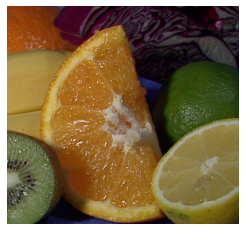

In [ ]:
image = image_origin

show_images([image.numpy()])

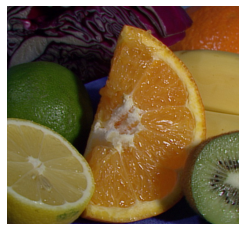

In [ ]:
#水平方向（左右）反転処理
#TensorFlow/Keras APIのtf.image.random_flip_left_rightを用いる
#反転するか否かはランダム調整

image = image_origin
image = tf.image.random_flip_left_right(image, seed=123)

show_images([image.numpy()])

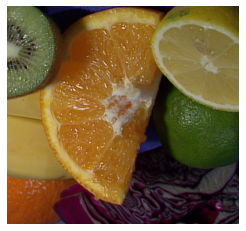

In [ ]:
#垂直方向（上下）反転処理
#TensorFlow/Keras APIのtf.image.random_flip_up_downを用いる
#反転するか否かはランダム調整
image = image_origin
image = tf.image.random_flip_up_down(image, seed=123)

show_images([image.numpy()])

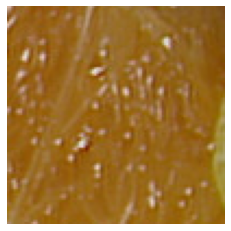

In [ ]:
#あるサイズを画像中からランダムに切り出す処理
#TensorFlow/Keras APIのtf.image.random_cropを用いる
#引数sizeで、切り出す画像のサイズを指定
image = image_origin
image = tf.image.random_crop(image, size=(100, 100, 3), seed=123)

show_images([image.numpy()])

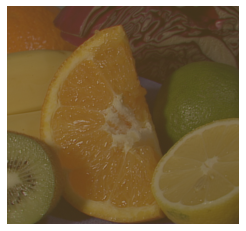

In [ ]:
#コントラストをランダムに調整する処理
#TensorFlow/Keras APIのtf.image.random_contrastを用いる
#引数lowerとupperで、コントラストの強弱の下限値と上限値を指定
image = image_origin
image = tf.image.random_contrast(image, lower=0.4, upper=0.6)

show_images([image.numpy()])

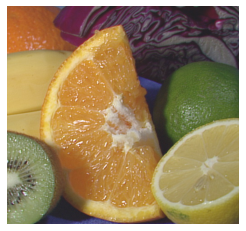

In [ ]:
#輝度値 𝛿 をランダムに調整する処理
#TensorFlow/Keras APIのtf.image.random_brightnessを用いる
#-max_delta ≤𝛿< max_delta
image = image_origin
image = tf.image.random_brightness(image, max_delta=0.8)

show_images([image.numpy()])

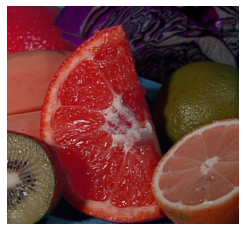

In [ ]:
#色相 𝛿 をランダムに調整する処理
#TensorFlow/Keras APIのtf.image.random_hueを用いる
#-max_delta ≤𝛿< max_delta
image = image_origin
image = tf.image.random_hue(image, max_delta=0.1)

show_images([image.numpy()])

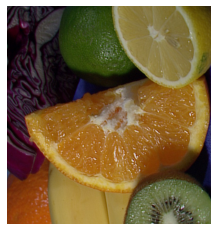

In [ ]:
#回転処理
#TensorFlow/Keras APIには、90度単位で回転させるtf.image.rot90と、角度限定なしのtf.keras.preprocessing.image.random_rotationがある
#tf.image.rot90
#引数k ×90∘ で反時計回りに回転
#tf.keras.preprocessing.image.random_rotation
#引数rgで回転範囲を指定
#回転角度はランダム調整
image = image_origin
image = tf.image.rot90(image, k=1)

show_images([image.numpy()])

# image = image_origin
# array = tf.keras.preprocessing.image.img_to_array(image) 
# array = tf.keras.preprocessing.image.random_rotation(array, rg=360, row_axis=0, col_axis=1, channel_axis=2)
# image = tf.keras.preprocessing.image.array_to_img(array)

# show_images([image])

水増し手法: 大きさがランダムの矩形領域で画像をマスクさせる
参考資料: "Random Erasing Data Augmentation"

In [ ]:
def random_erasing(img, prob = 0.5, sl = 0.02, sh = 0.4, r1 = 0.2, r2 = 0.8):
    if np.random.random() < prob:
        return img
    else:
        H = img.shape[0]
        W = img.shape[1]
        S = H * W
        while True:
            S_e = S * np.random.uniform(low=sl, high=sh)
            r_e = np.random.uniform(low=r1, high=r2)

            H_e = np.sqrt(S_e * r_e)
            W_e = np.sqrt(S_e / r_e)

            x_e = np.random.randint(0, W)
            y_e = np.random.randint(0, H)

            if x_e + W_e <= W and y_e + H_e <= H:
                img_modified = np.copy(img)
                img_modified[y_e:int(y_e + H_e + 1), x_e:int(x_e + W_e + 1), :] = np.random.uniform(0, 1)
                return img_modified
                

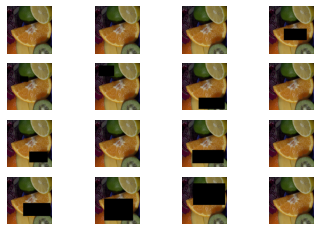

In [ ]:
show_images([
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             random_erasing(image.numpy()),
             ])

水増し手法: 2つの学習データを混合（ラベル/データ双方を線形補完）させる
参考資料: "mixup: Beyond Empirical Risk Minimization"

In [ ]:
def sample_beta_distribution(size, concentration_0, concentration_1):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)

In [ ]:
def mix_up(ds_one, ds_two, alpha=0.4):
    # ds_oneとds_twoは10枚分ずれたmnistのデータセット。
    # どちらのデータセットにも入力データの画像とラベルが含まれている。
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two

    # この後の処理で必要なため、データセットのバッチサイズを取得
    batch_size = tf.shape(images_one)[0]

    # 上で定義したベータ分布に基づくサンプリングで、バッチサイズ分の混合割合を取得。
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # 2つのデータセットを混合割合に基づいて、入力データ･ラベルの両方を混合する。
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

11501568/11490434 [==============================] - 0s 0us/step
ラベル:  [0.0, 0.0, 0.0, 0.01799619197845459, 0.0, 0.9820038080215454, 0.0, 0.0, 0.0, 0.0]
ラベル:  [0.1021728366613388, 0.0, 0.0, 0.0, 0.0, 0.8978271484375, 0.0, 0.0, 0.0, 0.0]
ラベル:  [0.0, 0.0, 0.0, 0.025149226188659668, 0.9748507738113403, 0.0, 0.0, 0.0, 0.0, 0.0]
ラベル:  [0.0, 0.15419164299964905, 0.0, 0.0, 0.0, 0.0, 0.8458083868026733, 0.0, 0.0, 0.0]
ラベル:  [0.0, 0.7293325066566467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27066749334335327]
ラベル:  [0.0, 0.0, 0.0837658941745758, 0.0, 0.0, 0.0, 0.0, 0.9162341356277466, 0.0, 0.0]
ラベル:  [0.0, 0.38972386717796326, 0.6102761030197144, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ラベル:  [0.0, 0.0, 0.0, 0.9961815476417542, 0.0, 0.0, 0.0, 0.0, 0.0038184523582458496, 0.0]
ラベル:  [0.0, 0.8105068802833557, 0.0, 0.0, 0.0, 0.0, 0.1894931197166443, 0.0, 0.0, 0.0]


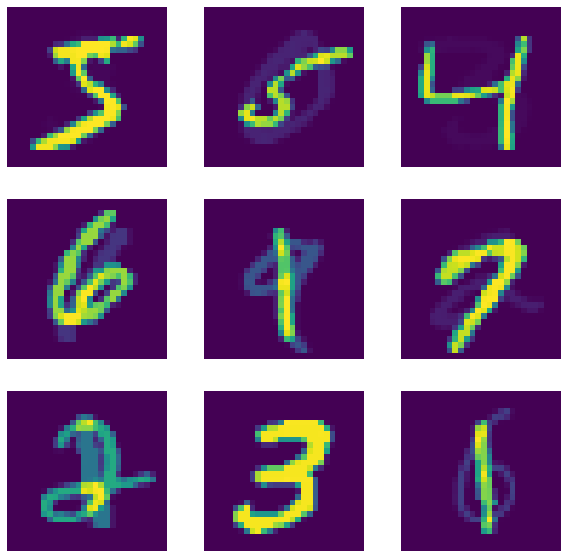

In [ ]:
# mnistデータセットの読み込み
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# データを正規化し、28x28の画像の形状に変形する。
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

# ラベルをone-hotラベルの形式に変形する
y_train = tf.one_hot(y_train, 10)

# 10枚分ずれたデータセットを取得する。
# 1つ目のデータセットは、0枚目からmnistの最後から10こ手前まで。
# 2つ目のデータセットは、10枚目からmnistの最後まで。
# また、16枚でミニバッチを構成する
BATCH_SIZE = 16
train_ds_one = (tf.data.Dataset.from_tensor_slices((x_train[:-10], y_train[:-10])).batch(BATCH_SIZE))
train_ds_two = (tf.data.Dataset.from_tensor_slices((x_train[10:], y_train[10:])).batch(BATCH_SIZE))

# 10枚ずれたデータセット同士を連結し、MixUpの組合せを作る。
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

# 先に定義したMixUpの関数を使って、2つのデータセットを処理する。
train_ds_mu = train_ds.map(lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.4))

# MixUpされた9枚の画像を表示する。
# One-hot表現されたラベルも混合されていることがわかる。
sample_images, sample_labels = next(iter(train_ds_mu))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:9], sample_labels[:9])):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().squeeze())
    print('ラベル: ', label.numpy().tolist())
    plt.axis("off")

複数の手法の組み合わせ

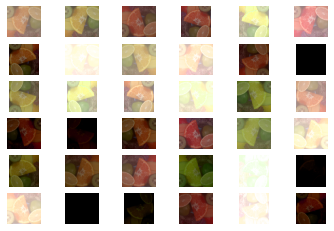

In [ ]:
def data_augmentation(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_contrast(image, lower=0.4, upper=0.6)
    image = tf.image.random_brightness(image, max_delta=0.8)
    image = tf.image.rot90(image, k=random.choice((0, 1, 2)))
    image = tf.image.random_hue(image, max_delta=0.1)
    return image

image = image_origin

show_images([data_augmentation(image).numpy() for _ in range(36)])

# フレームワーク演習 activation_functions
## 活性化関数について
ニューラルネットワークの順伝播（forward）では、線形変換で得た値に対して、非線形な変換を行う。非線形な変換を行う際に用いられる関数を、活性化関数という。

入力データ（説明変数）を$x$、総入力データを$u$、中間層出力データを$z$、出力データ（予測データ）を$y$、重みを$W$、バイアスを$b$とする、入力層サイズ$3$、中間層サイズ$2 \times 1$、出力層サイズ$2$のニューラルネットワークは、

<fig>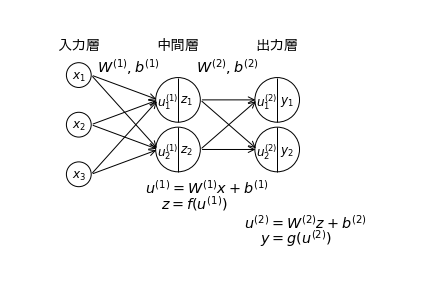
<figcaption>図2: ニューラルネットワーク</figcaption>
</fig>

のように図示することができる。

図2の中の数式

$$
\begin{eqnarray*}
u^{(1)} &=& W^{(1)}x + b^{(1)} \\
z &=& f(u^{(1)}) \\
\\
u^{(2)} &=& W^{(2)}z + b^{(2)} \\
y &=& g(u^{(2)}) \\
\end{eqnarray*}
$$

の、$f$を「中間層に用いる活性化関数」、$g$を「出力層に用いる活性化関数」という。

今日では一般に、ニューラルネットワークの学習（パラメータの探索）では、逆伝播（backward）アルゴリズムとして、微分法における連鎖律を利用した誤差逆伝播法が用いられる。そのため、微分可能、かつ渡された値から直接的に微分値を求める導関数が利用できるという要件を満たした活性化関数が用いられる傾向にある。関数$f$の導関数は、$\frac{\partial}{\partial x}f$または$f^{\prime}$と表す。

図2をKerasを用いて実装すると、次のようになる。活性化関数は、`keras.layers.Activation`で指定する。

In [ ]:
# relu softmax
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('relu'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Swish softmax
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('swish'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 activation_4 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Sigmoid softmax
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('sigmoid'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 activation_6 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# tanh softmax
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('tanh'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 activation_8 (Activation)   (None, 2)                 0         
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 activation_9 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LeakyReLU softmax
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('LeakyReLU'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
 activation_11 (Activation)  (None, 2)                 0         
                                                                 
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 activation_12 (Activation)  (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# relu sigmoid
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('relu'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('sigmoid'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 activation_13 (Activation)  (None, 2)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 6         
                                                                 
 activation_14 (Activation)  (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# relu identify
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('relu'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('linear'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 8         
                                                                 
 activation_17 (Activation)  (None, 2)                 0         
                                                                 
 dense_18 (Dense)            (None, 2)                 6         
                                                                 
 activation_18 (Activation)  (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


中間層の用いる活性化関数にステップ関数、シグモイド関数、tanh、ReLU、LeakyReLU、Swishなどがある。  
2値分類の出力層の活性化関数としてシグモイド関数、多値分類の出力層の活性化関数としてソフトマックス関数を用いる。  
回帰の場合には恒等関数を用いるため、活性化関数はなし。

# RNN・LSTM(Keras)

In [ ]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

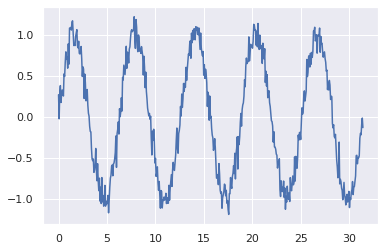

In [ ]:
## データ生成
# sin曲線+ノイズ
ts = np.linspace(0, 10 * np.pi, 500)
ys = np.sin(ts) + np.random.normal(scale=0.1, size=len(ts))
plt.plot(ts, ys)

In [ ]:
# 学習設定
batch_size = 32    # ミニバッチサイズ
n_steps = 50       # 入力系列の長さ
input_size = 1     # 入力の次元
hidden_size = 50   #  中間層のユニット数
output_size = 1    # 出力層の次元

lr = 0.005         # 学習率(SGD)
n_iter = 300       # イテレーション回数

In [ ]:
# 訓練データとテストデータに分割
train_ratio = 0.8
data = []
for i in range(len(ys) - n_steps - 1):
    data.append(ys[i: i+n_steps+1])
data = np.array(data, dtype=np.float32)
n_train = int(train_ratio * len(data))
x_train, y_train = np.split(data[:n_train], [-1], axis=1)
x_test, y_test = np.split(data[n_train:], [-1], axis=1)

x_train = np.reshape(x_train, [-1, n_steps, input_size])
x_test = np.reshape(x_test, [-1, n_steps, input_size])

In [ ]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()  
model.add(SimpleRNN(hidden_size))
# model.add(LSTM(hidden_size))
model.add(Dense(output_size))

# 損失関数と最適化手法を設定
model.compile(loss=mean_squared_error,
                          optimizer=Adam()
#                           optimizer=SGD(lr)
                          )

In [ ]:
epochs = int(n_iter * batch_size / len(x_train))
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs) 

Epoch 1/26
12/12 [==============================] - 8s 68ms/step - loss: 0.0443
Epoch 2/26
12/12 [==============================] - 1s 69ms/step - loss: 0.0246
Epoch 3/26
12/12 [==============================] - 1s 83ms/step - loss: 0.0213
Epoch 4/26
12/12 [==============================] - 1s 73ms/step - loss: 0.0181
Epoch 5/26
12/12 [==============================] - 1s 92ms/step - loss: 0.0169
Epoch 6/26
12/12 [==============================] - 1s 98ms/step - loss: 0.0161
Epoch 7/26
12/12 [==============================] - 1s 90ms/step - loss: 0.0161
Epoch 8/26
12/12 [==============================] - 1s 66ms/step - loss: 0.0150
Epoch 9/26
12/12 [==============================] - 1s 39ms/step - loss: 0.0156
Epoch 10/26
12/12 [==============================] - 0s 32ms/step - loss: 0.0154
Epoch 11/26
12/12 [==============================] - 0s 33ms/step - loss: 0.0152
Epoch 12/26
12/12 [==============================] - 0s 33ms/step - loss: 0.0151
Epoch 13/26
12/12 [==================

In [ ]:
# テストデータに対する予測
prediction = model.predict(x_test)

# 1次元配列に
prediction = prediction.reshape(-1)
true_y = y_test.reshape(-1)

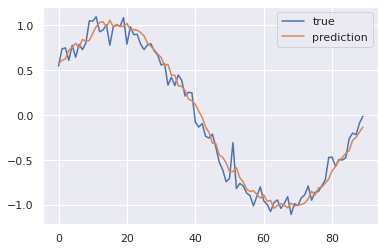

In [ ]:
# テストデータに対する予測を可視化
xx = np.arange(len(prediction))
plt.plot(xx, true_y, label='true')
plt.plot(xx, prediction, label='prediction')
plt.legend()

In [ ]:
# 再帰的な予測
# テストデータの最初のデータからスタートし、
# モデルの予測を利用し再帰的に予測
curr_x = x_test[0]
predicted = []
# 予測するステップ数
N = 200
for i in range(N):
    # 予測
    predicted.append(model.predict(curr_x[None]))
    # 入力を更新
    curr_x = np.insert(curr_x, n_steps, predicted[-1], axis=0)[1:]

# 1次元配列に
predicted = np.array(predicted).reshape(-1)

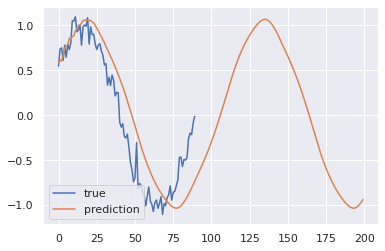

In [ ]:
#再帰的な予測を可視化
plt.plot(xx, true_y, label='true')
plt.plot(np.arange(N), predicted, label='prediction')
plt.legend()